In [59]:
# Importing the rquired libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Importing data (training data) and showing the head
df = pd.read_csv(r'C:\Users\shahr\OneDrive\Desktop\GithubRepositories\Kaggle---House-Price-Prediction\train.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
# Showing the numebr of null values in each column
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

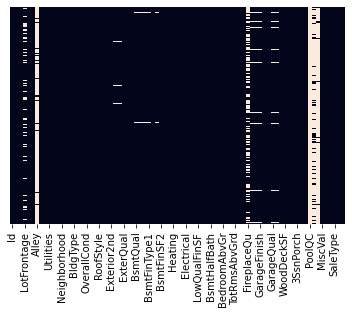

In [62]:
# Visualizing the missing values using heatmap. The white lines show the missing values.
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

The heatmap shows the amount of missing values in each column.

It is faesible to removed the columns that has more than 50% missing values.

In [63]:
df.drop(df.columns[df.isnull().sum() >= 730],axis=1,inplace=True)
df.shape

(1460, 77)

In [68]:
# We can also drop the 'ID' column as it is not useful for predictions.
df.drop(['Id'], axis=1,inplace=True)

After finding and removing features with high number of missing values, I tried to fill the missing values of each feature. Handling the missing values is the first step in feature engineering.

Some points about the missing values:
1. If the feature is a continuous data: you can replace the missing value with mean, mode, median, and even the previous data (specifically in time-series data).

2. If the feature is a categorical data: you can replace the missing value with the most frequent category of the feature.

In [65]:
# Demonstrating the type of features including missing values
# Objects are categorical features and float64 is continuous feature.
df_with_null = df[df.columns[df.isnull().sum() > 0]]
df_with_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   Electrical    1459 non-null   object 
 9   FireplaceQu   770 non-null    object 
 10  GarageType    1379 non-null   object 
 11  GarageYrBlt   1379 non-null   float64
 12  GarageFinish  1379 non-null   object 
 13  GarageQual    1379 non-null   object 
 14  GarageCond    1379 non-null   object 
dtypes: float64(3), object(12)
memory usage: 171.2+ KB


In [27]:
# Filling the missing values of 'LotFrontage'
# As an initial solution, I replaced the missing values of 'LotFrontage' with the mean of the values.

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [69]:
# Filling the missing values of 'MasVnrArea', 'GarageYrBlt' as the remaining continuous values
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [66]:
# Filling the missing values of 'MasVnrType', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond'.
# These features are categorical features and we can replace the missing values with the 'mode' of each feature.
# Mode of each feature is the most frequent category of each feature.
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

<AxesSubplot:>

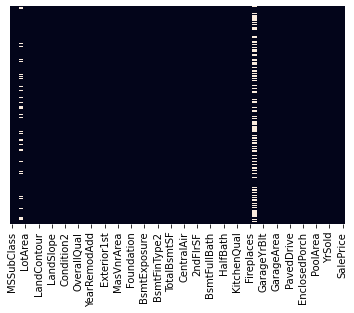

In [76]:
# Demonstrating heatmap of missing values to double check if there is any remaining missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [77]:
# Showing the remaining missing values
df[df.columns[df.isnull().sum() > 0]]

,LotFrontage,FireplaceQu
0,65.0,NaN
1,80.0,TA
2,68.0,TA
3,60.0,Gd
4,84.0,TA
...,...,...
1455,62.0,TA
1456,85.0,TA
1457,66.0,Gd
1458,68.0,NaN


In [78]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])

<AxesSubplot:>

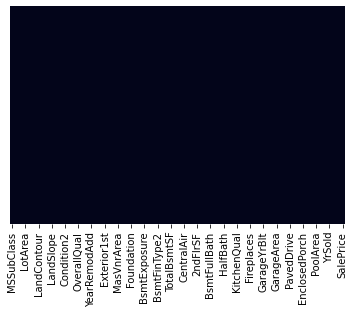

In [79]:
# Demonstrating heatmap of missing values to double check if there is any remaining missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

So far, I handled all the missing values by using 'mode' for the categorical features and using 'mean' for the numerical features. But to achieve a better accuracy we need to be more precise and choose a method specific to each feature. 

After handling the missing values, we go through handling the categorical features and converting them into variables that are recognizable for the machine learning models.

In [99]:
# Creating the list of all the categorical features
categorical_features = []
for feature in df.columns:
    
    if df[feature].dtype == 'object':
        
        categorical_features.append(feature)
len(categorical_features)

39

There are 39 categorical features. We can create a function that get each of the categorical features and apply OneHotEncoding using 'get_dummies'.

In [100]:
def category_onehotencoding(features):
    
    df_final = final_df
    i = 0
    for feature in features:
        
        df1 = pd.get_dummies(final_df[feature],drop_first = True)
        
        final_df.drop([feature],axis = 1,inplace = True)
        if i == 0:
            df_final = df1.copy()
            
        else:
            df_final = pd.concat([df_final,df1],axis= 1)
        i += 1
        
    df_final = pd.concat([final_df,df_final],axis = 1)
    
    return df_final
    

In [101]:
# It is good to have a copy of the dataframe
main_df = df.copy()

Before applying OneHotEncoding, it is better to apply the same procedures of handling missing values for the test set, then combining the train set and test set together to handle the categorical features. Because, it is possible that some of the categorical features of the test set have different categories compare to train set. 
If you have any questions, you can ask me in my LinkedIn (Shahrad Shakerian)

In [103]:
# Handling the missing values of the test set
test_df = pd.read_csv(r'C:\Users\shahr\OneDrive\Desktop\GithubRepositories\Kaggle---House-Price-Prediction\test.csv')
test_df.shape

(1459, 80)

In [116]:
# Removing the same columns that had high amount of missing values in the test set and we deleted them from the test set.
test_df.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace= True)

In [119]:
test_df.shape

(1459, 75)

In [104]:
# Handling missing values of numerical features
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean())
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mean())

In [105]:
# Handling missing values of categorical features
test_df['MasVnrType'] = test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['BsmtQual'] = test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
test_df['BsmtCond'] = test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtExposure'] = test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])
test_df['Electrical'] = test_df['Electrical'].fillna(test_df['Electrical'].mode()[0])
test_df['GarageType'] = test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])
test_df['GarageFinish'] = test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual'] = test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond'] = test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])

In [117]:
# Checking the remaining missing values
test_df[test_df.columns[test_df.isnull().sum() > 0]]

,MSZoning,Utilities,Exterior1st,Exterior2nd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,FireplaceQu,GarageCars,GarageArea,SaleType
0,RH,AllPub,VinylSd,VinylSd,468.0,144.0,270.0,882.0,0.0,0.0,TA,Typ,NaN,1.0,730.0,WD
1,RL,AllPub,Wd Sdng,Wd Sdng,923.0,0.0,406.0,1329.0,0.0,0.0,Gd,Typ,NaN,1.0,312.0,WD
2,RL,AllPub,VinylSd,VinylSd,791.0,0.0,137.0,928.0,0.0,0.0,TA,Typ,TA,2.0,482.0,WD
3,RL,AllPub,VinylSd,VinylSd,602.0,0.0,324.0,926.0,0.0,0.0,Gd,Typ,Gd,2.0,470.0,WD
4,RL,AllPub,HdBoard,HdBoard,263.0,0.0,1017.0,1280.0,0.0,0.0,Gd,Typ,NaN,2.0,506.0,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,AllPub,CemntBd,CmentBd,0.0,0.0,546.0,546.0,0.0,0.0,TA,Typ,NaN,0.0,0.0,WD
1455,RM,AllPub,CemntBd,CmentBd,252.0,0.0,294.0,546.0,0.0,0.0,TA,Typ,NaN,1.0,286.0,WD
1456,RL,AllPub,VinylSd,VinylSd,1224.0,0.0,0.0,1224.0,1.0,0.0,TA,Typ,TA,2.0,576.0,WD
1457,RL,AllPub,HdBoard,Wd Shng,337.0,0.0,575.0,912.0,0.0,1.0,TA,Typ,NaN,0.0,0.0,WD


In [122]:
features_including_missing_values = test_df.columns[test_df.isnull().sum() > 0]
features_including_missing_values

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageCars', 'GarageArea', 'SaleType'],
      dtype='object')

In [124]:
# Writing a function to replace the remaining missing values of the features of the test set.
def replace_missing_value(features):
    
    for feature in features:
        
        if test_df[feature].dtype == 'object':
            
            test_df[feature] = test_df[feature].fillna(test_df[feature].mode()[0])
            
        else:
            test_df[feature] = test_df[feature].fillna(test_df[feature].mean())
            
    return test_df

In [125]:
replace_missing_value(features_including_missing_values)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [129]:
# Checking if there is any remaining missing values in the test set
[test_df.isnull().sum() > 0] == True

False

After handling the missing values of the test set, it is needed to handle the categorical features of the train set and test set together.

In [182]:
test_df.shape

(1459, 75)

In [183]:
df.shape

(1460, 76)

Comparing the shapes of the training set and the test set demonstrates that training set has one more column, which is the 'SalePrice' and it is reseanable. 

For more questions, feel free to contact me on my LinkedIn (Shahrad Shakerian)

In [196]:
# Concatinating the test data and the training data
final_df = pd.concat([df,test_df], axis=0)
final_df.shape

(2919, 76)

In [197]:
# Handling the categorical features, using the developed function earlier
final_df = category_onehotencoding(categorical_features)

In [198]:
final_df.shape

(2919, 237)

In [199]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [200]:
# Removing duplicated columns in the dataset
final_df = final_df.loc[:,~final_df.columns.duplicated()]
final_df.shape

(2919, 177)

In [201]:
# Splitting the training and testing datasets
df_train = final_df.iloc[:1460,:]
df_test = final_df.iloc[1460:,:]

In [202]:
df_train.shape

(1460, 177)

In [203]:
df_test.shape

(1459, 177)

In [204]:
# Droppin gthe 'SalePrice' column in the test set
df_test.drop('SalePrice', axis =1, inplace = True)

C:\Users\shahr\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


After handling the categorical data, it is time to prepare the dataset to train machine learning models.

#### Training Random Forest using the training set

In [205]:
# Separating the features and the target variable
X = df_train.drop('SalePrice',axis = 1)
y = df_train['SalePrice']

In [206]:
# RF doesn't need feature scaling
# Splitting the dataset
from sklearn.model_selection import train_test_split
# Selecting 80% of the training dataset for trainig the model and 20% of the training data for model validation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [207]:
# Importing the model and fitting it over the data

from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [208]:
# Predicting the price of the splitted training data
y_pred = reg_rf.predict(X_test)

# Evaluating the performance of the trained model
reg_rf.score(X_train, y_train)

0.9770871861520805

In [209]:
# Validating the model performance
reg_rf.score(X_test,y_test)

0.8934036720124936

C:\Users\shahr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


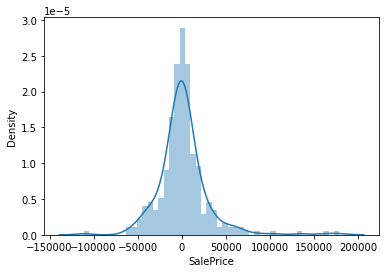

In [210]:
# Plotting the y_test and y_pred results for better illustration 
# (just in regression problem that you are dealing with continuous variables)

sns.distplot(y_test - y_pred)
plt.show()

In [211]:
# Evaluating the performance of the model using different metrics
from sklearn import metrics

print('MAE', metrics.mean_absolute_error(y_test,y_pred))
print('MSE', metrics.mean_squared_error(y_test,y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# Checking the r2 score
metrics.r2_score(y_test,y_pred)

MAE 17672.66419520548
MSE 817628608.1524849
RMSE 28594.20584930599


0.8934036720124936

This is training the RF model without hyperparameter tuning. To increase the accuracy you can do the hyperparameter tuning. You can use my previous Kaggle project for the hyperparameter tuning part. Here's the link to the project:

https://github.com/Shahrad-Shakerian/Prediction-of-Flight-Price/blob/main/Flight%20Price%20Prediction%20(Kaggle%20Project).ipynb#:~:text=main-,Prediction%2Dof%2DFlight%2DPrice,-/Flight%20Price

### Feel free to directly send me messages on LinkedIn (Shahrad Shakerian) and ask your questions for getting a job as a data scientist with any kind of background and experience you have.

Reference of some parts of the codes for this repository:
Krish Naik (Awsome YouTube channel for data scientist)